In [169]:
#  release an unreferenced memory 

import gc
gc.collect()

277

In [170]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import statsmodels.api as sm
import warnings
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [171]:
plt.style.use('fivethirtyeight')

In [172]:
warnings.filterwarnings("ignore")

In [173]:
#read in df

layoff_merge_new_clean =pd.read_csv(r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets\Prepared data\layoff_merge_new_clean.csv')

In [174]:
layoff_merge_new_clean.head(5)

Unnamed: 0    State                   company_x  total_laid_off  \
0           0  Alabama  Corsicana Mattress Company              42   
1           1  Alabama                   EARTHLINK              42   
2           2  Alabama      JOHNSON CONTROLS, INC.              42   
3           3  Alabama                  FOOD WORLD              42   
4           4  Alabama                  FOOD WORLD              42   

         date     location industry        country  
0  2021-07-26  SF Bay Area   Crypto  United States  
1  2015-02-04  SF Bay Area   Crypto  United States  
2  2011-05-13  SF Bay Area   Crypto  United States  
3  2009-03-16  SF Bay Area   Crypto  United States  
4  2009-03-16  SF Bay Area   Crypto  United States

In [175]:
data =layoff_merge_new_clean.drop(columns=['Unnamed: 0', 'State', 'company_x', 'location', 'industry', 'country'])

In [176]:
data.shape

(360541, 2)

In [177]:
data.columns

Index(['total_laid_off', 'date'], dtype='object')

In [178]:
data.head(5)

total_laid_off        date
0              42  2021-07-26
1              42  2015-02-04
2              42  2011-05-13
3              42  2009-03-16
4              42  2009-03-16

In [179]:
data.plot()
plt.show()

In [180]:
data_2 = data.reset_index()

In [181]:
data_2.head(5)

index  total_laid_off        date
0      0              42  2021-07-26
1      1              42  2015-02-04
2      2              42  2011-05-13
3      3              42  2009-03-16
4      4              42  2009-03-16

In [182]:
data_2 = data_2.rename(columns={"date": "Date"})

In [183]:
data_2.head()

index  total_laid_off        Date
0      0              42  2021-07-26
1      1              42  2015-02-04
2      2              42  2011-05-13
3      3              42  2009-03-16
4      4              42  2009-03-16

In [184]:
# Setting 'date' as index

data_2['date']= pd.to_datetime(data_2['Date']) # Create a datetime column from 'date'
data_2= data_2.set_index('date') # Set datetime as index for dataframe
data_2.drop(['Date'], axis=1, inplace=True) # drop the date column
data_2.head(5)

index  total_laid_off
date                             
2021-07-26      0              42
2015-02-04      1              42
2011-05-13      2              42
2009-03-16      3              42
2009-03-16      4              42

In [185]:
data_2 =data_2.drop(columns=['index'])

In [186]:
data_2.head(5)

total_laid_off
date                      
2021-07-26              42
2015-02-04              42
2011-05-13              42
2009-03-16              42
2009-03-16              42

In [187]:
data_2.plot()

<AxesSubplot:xlabel='date'>

#### Observations

There is a lot of noise in this data which makes it difficult to interpet.  I decided to drop the null values.

In [188]:
data_2.dropna()

total_laid_off
date                      
2021-07-26              42
2015-02-04              42
2011-05-13              42
2009-03-16              42
2009-03-16              42
...                    ...
2012-06-01             384
2009-03-03             495
2014-04-30             611
2022-10-11             611
2020-04-22            1877

[360541 rows x 1 columns]

In [189]:
data_2.plot()

<AxesSubplot:xlabel='date'>

#### Oberservations

The data is easier to interpet and the are trends starting to emerge but there is still to much noise to make any concrete determination.  There does seem to be a spike in total number of layoff every four years. 

In [198]:
# Decompose dataset

result=sm.tsa.seasonal_decompose(data_2, model='additive', period=12)

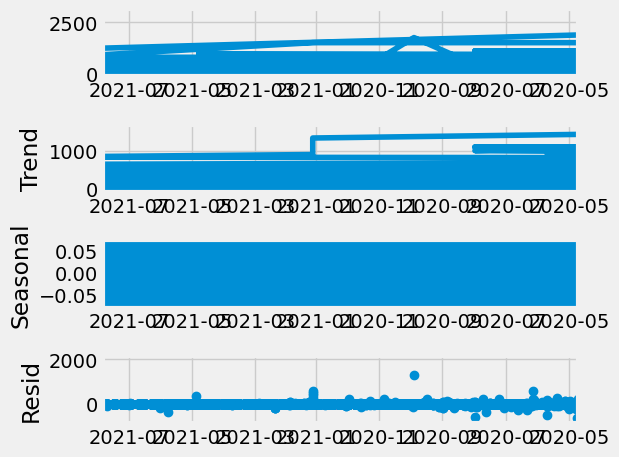

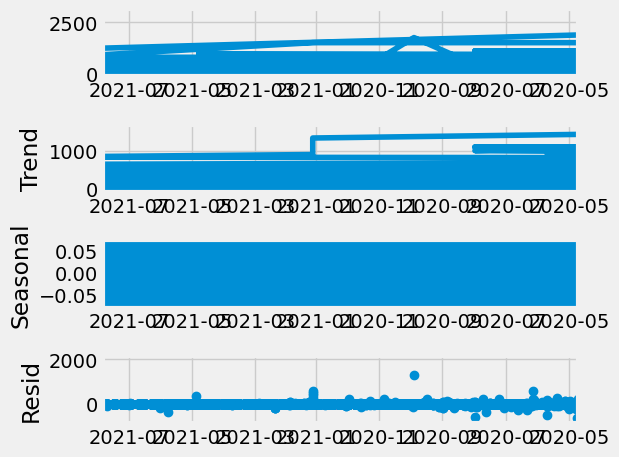

In [199]:
result.plot()

#### Obersvations

The decompistion plot was impossible to interpet.  I decided to smooth out the date and run again.

In [220]:
# Resample by month end date
data_smooth =data_2.resample(rule= 'M').mean()

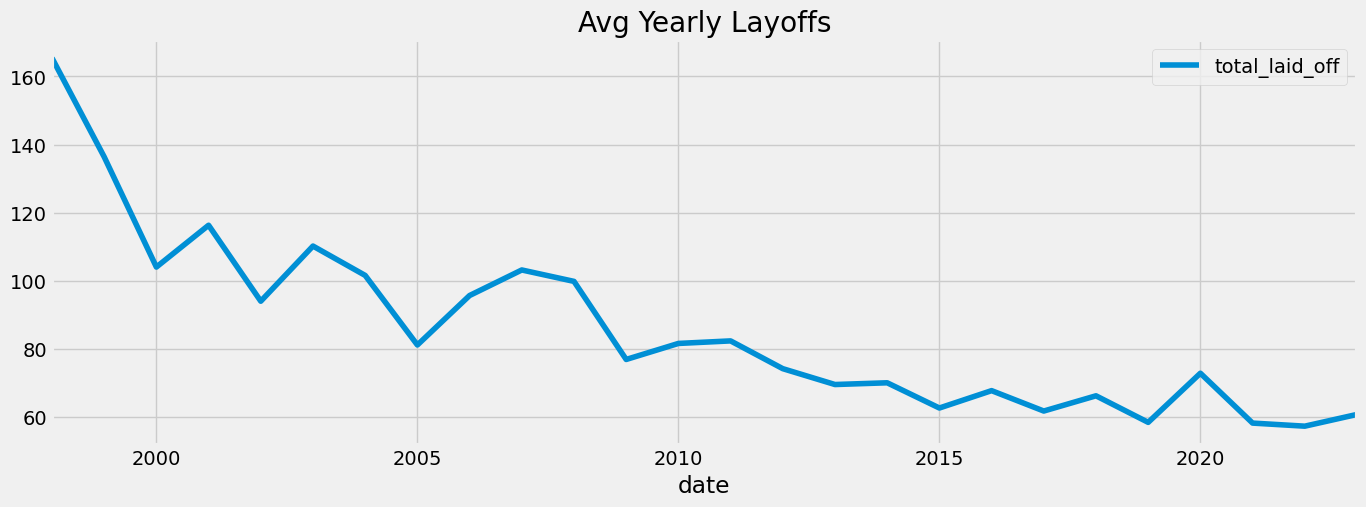

In [221]:
# Resample plot
data_smooth.resample('Y').mean().plot(figsize=(15,5), title='Avg Yearly Layoffs');

#### Observations

From this plot we can see that there is an overall downward trend in layoffs year over year.

<Figure size 640x480 with 0 Axes>

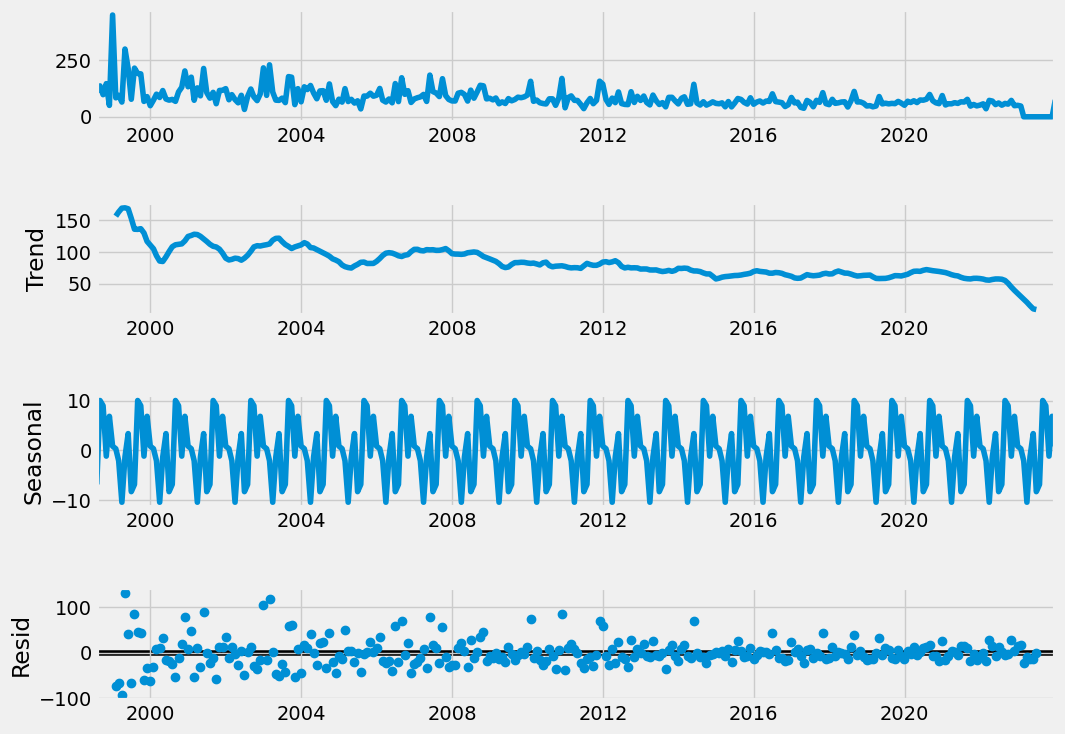

In [237]:
#check characteristics of time series data

decompose =seasonal_decompose(data_smooth.resample('M').sum())
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)

#### Observations

There is a clear downward trend layoffs year over year starting 2000, with short momentary spikes which should be explored further. There is a very steep decline in layoffs in 2020.

In [239]:
data_clean = data_smooth.dropna()

In [240]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

In [241]:
# ADF Test

series = np.random.randn(100)
result = adfuller(data_clean, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -3.1391644860560013
n_lags: 0.02378736196472496
p-value: 0.02378736196472496
Critial Values:
   1%, -3.453342167806272
Critial Values:
   5%, -2.871663828287282
Critial Values:
   10%, -2.572164381381345


### Observations

The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

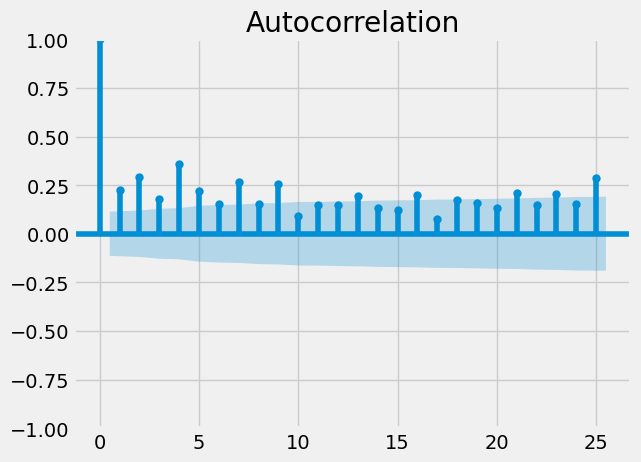

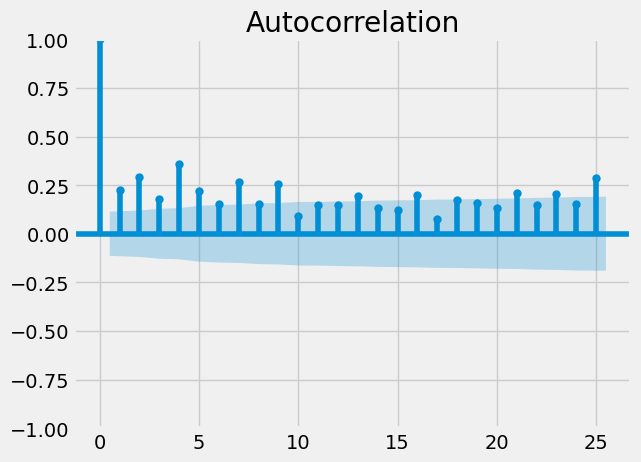

In [242]:
# plot the auto correlation

plot_acf(data_clean)

#### Observations

An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.  ACF seems to match the decomposition results. 

In [243]:
#Create a path

path_new = r'C:\Users\senoe\OneDrive\SEN Docs\Data Sci Job Applications\CareerFoundry\Datasets'

In [244]:
# Export data to csv

layoff_merge_clusters.to_csv(os.path.join(path_new, 'Prepared data', 'data_clean.csv'))